# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [1]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

In [2]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [3]:
(list(data.columns)), data.shape

(['id',
  'Place Name',
  'Rating',
  'Checkins',
  'Users',
  'Visits',
  'Pricing',
  'Type',
  'Category',
  'Class',
  'geometry'],
 (106287, 11))

In [4]:
data.head(1)

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,geometry
0,50ad0afce4b0b4a7430e2268,Terry's Wine Shop,8.8,294,217,337,None,Wine Shop,Consumption,Optional,POINT (-74.00034036700906 40.73518392010902)


In [5]:
list(data.columns)[-4:-1]

['Type', 'Category', 'Class']

In [6]:
X_dummies = data[list(data.columns)[-4:-1]]
print(X_dummies.shape)
X_dummies = pd.get_dummies(X_dummies)
Fq_dummies = pd.concat([data, X_dummies], axis=1, join='inner')  
Fq_dummies.shape

(106287, 3)


(106287, 716)

# Census Tract shapefile
- imports the Census Tract shapefile


In [7]:
# create the directory for shapefiles and set the environmental variable to it

#masterdata = os.getenv("Master")
#if masterdata is None:
#    os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#    masterdata = os.getenv("Master")
#    print("Warning: Master environmental variable not found and set by code, please review!")
#print("Master: {}".format(masterdata))

In [8]:
# create the directory for shapefiles and set the environmental variable to it

# masterdata = os.getenv("Master")
# if masterdata is None:
#     os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#     masterdata = os.getenv("Master")
#     print("Warning: Master environmental variable not found and set by code, please review!")
# print("Master: {}".format(masterdata))
# def getGeoDataFrameFromShpFileZipUrl(url):
#     '''
#     This function downloads the zip file, unzips it into the dorectory 
#     pointed to by PUIdata environment variable. Then it 
#     reads it into a gepandas dataframe
#     '''
    
#     folderName = 'shape'+ \
#         str(len(os.listdir(os.getenv('TaxiData')))+1)
#     os.makedirs(os.getenv('Master') + '/' + folderName)
#     urlretrieve(url, "region.zip")
#     os.system('unzip -d $Master'+'/'+folderName+' region.zip')
#     filenames = [f for f in os.listdir(os.getenv('Master') + '/' + folderName) if f.endswith('.shp') ]
#     shapeFile = filenames[0]
#     shapeFilePath = os.getenv('Master') + '/' + folderName + '/' + shapeFile
#     return gpd.GeoDataFrame.from_file(shapeFilePath)


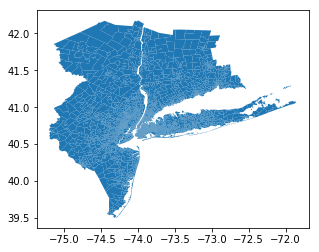

In [9]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()


In [10]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [11]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

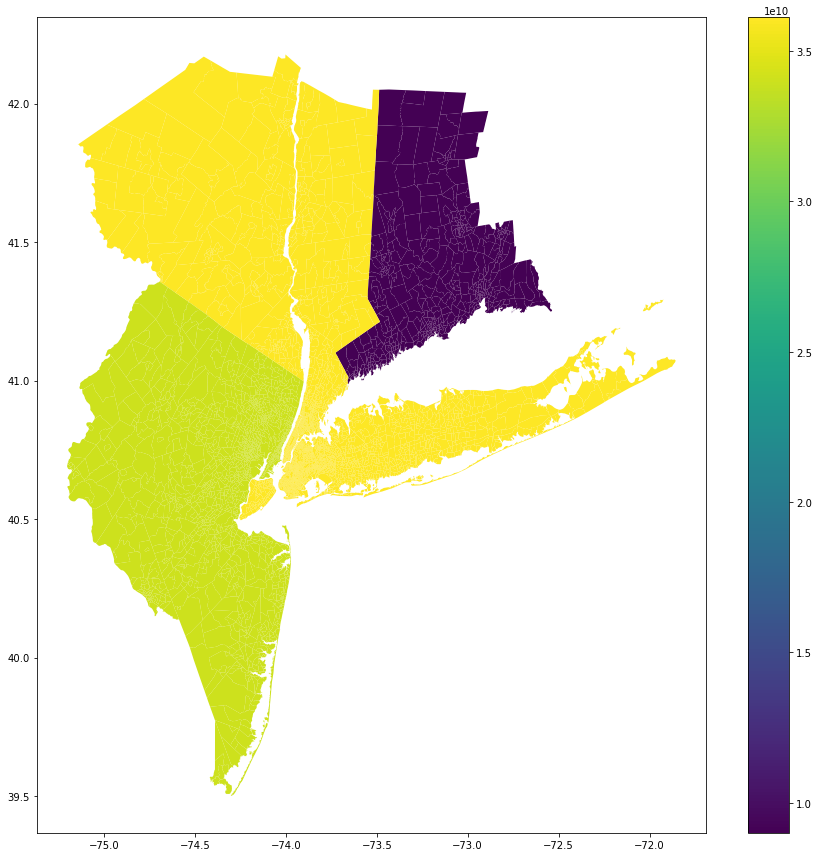

In [12]:
figure, ax = plt.subplots(figsize=(15, 15))
NYCzip.plot(column='GEOID',legend = True, ax=ax)

# Typologies
- import Typologies
- merges topologies
- map topologies

In [13]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
len(Typologiesgdp.columns)

82

In [14]:
Typologiesgdp['Type_1.19'].unique()

array(['VHI - Super Gentrification or Exclusion',
       'MHI - Ongoing Exclusion',
       'MHI - Stable or Early Stage of Exclusion',
       'MHI - Advanced Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'LI - Not Losing Low-Income Households',
       'LI - Ongoing Displacement of Low-Income Households',
       'Missing Data', 'LI - Ongoing Gentrification', nan], dtype=object)

In [15]:
Typologiesgdp['Type_binary'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['Type_binary'].replace('VHI - Super Gentrification or Exclusion',1,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Ongoing Exclusion',0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Stable or Early Stage of Exclusion',0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Advanced Exclusion', 0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Advanced Gentrification',1,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - At Risk of Gentrification',0,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Ongoing Gentrification',1,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Not Losing Low-Income Households',0,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Ongoing Displacement of Low-Income Households',0,inplace=True)
Typologiesgdp['Type_binary'].replace('Missing Data',0,inplace=True)
Typologiesgdp['Type_binary'].replace(nan,0,inplace=True)


0.0    0.818988
1.0    0.181012
Name: Type_binary, dtype: float64

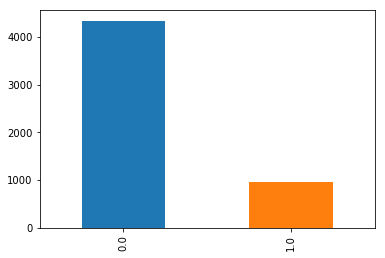

In [16]:
Typologiesgdp['Type_binary'].unique()
Typologiesgdp['Type_binary'].value_counts().plot(kind='bar')
Typologiesgdp['Type_binary'].value_counts()/Typologiesgdp['Type_binary'].value_counts().sum()

In [17]:
Typologiesgdp['Type_binary'].value_counts().sum()

5298

In [18]:
Typologiesgdp['Type_1.19'] = Typologiesgdp['Type_binary'].copy()

In [19]:
# Typologiesgdp.to_csv('typologies_binary.csv')
Typologiesgdp.drop(columns='Type_binary', inplace=True)

In [20]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','Type_1.19']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()

<class 'numpy.float64'>


,GEOID,Type_1.19
0,9.001010e+09,1.0
1,9.001010e+09,1.0
2,9.001010e+09,1.0
3,9.001010e+09,1.0
4,9.001010e+09,1.0


In [21]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
merged.tail()

,GEOID,geometry,Type_1.19
5285,36061021703,POLYGON ((-73.94607800039937 40.82126399983373...,0.0
5286,36061021800,POLYGON ((-73.94872800029694 40.80333100022552...,1.0
5287,36061021900,"POLYGON ((-73.9554510000636 40.81937700004859,...",0.0
5288,36061022102,POLYGON ((-73.94515500010318 40.82087599992749...,1.0
5289,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",0.0


In [22]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5290, 3)


(5290, 3)

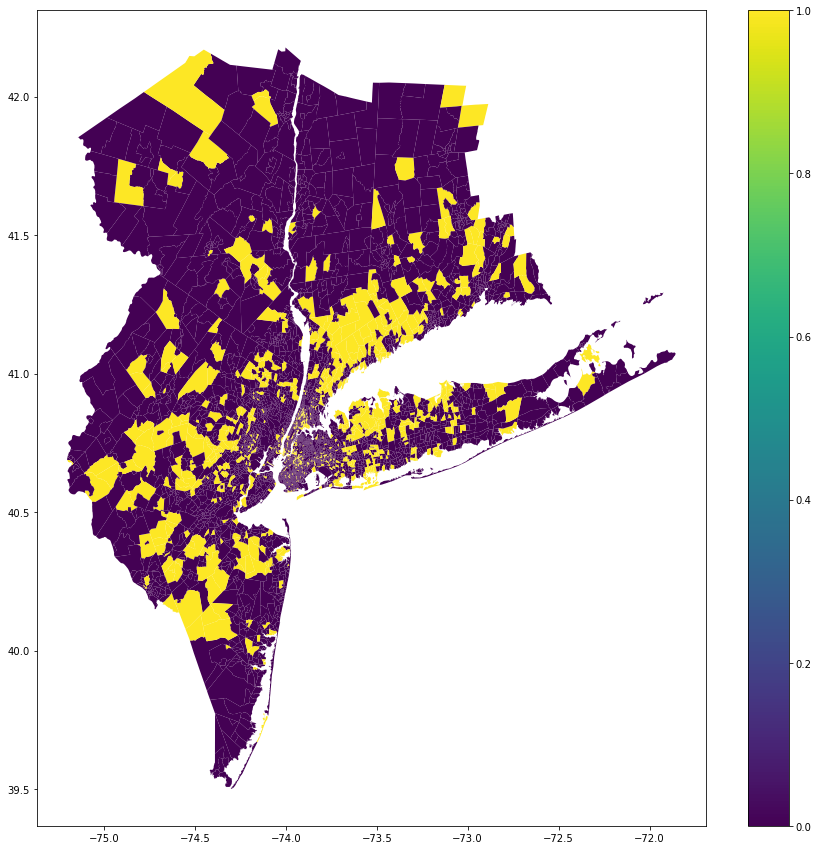

In [23]:
figure, ax = plt.subplots(figsize=(15, 15))
mergedgpd.plot(column='Type_1.19',legend = True, ax=ax)

# Spatail Join
- Spatail join by Census Tract
- map Businesses


In [24]:
mergedgpd.crs, data.crs, mergedgpd.shape, data.shape

(None, {'init': 'epsg:4326'}, (5290, 3), (106287, 11))

In [25]:
mergedgpd.crs = {'init' :'epsg:4326'}

In [26]:
mergedgpd.crs

{'init': 'epsg:4326'}

In [27]:
data_sjoined = gpd.sjoin(mergedgpd.drop(columns='Type_1.19'),Fq_dummies, op="contains")

In [28]:
# list(data_sjoined.columns)

In [66]:
data_sjoined_sum = data_sjoined.groupby(by='GEOID').sum()
print(data_sjoined_sum.shape,data_sjoined_sum.columns)
data_sjoined_sum_merged = data_sjoined_sum.merge(mergedgpd.loc[:,['GEOID','Type_1.19', 'geometry']],on='GEOID')
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)
data_sjoined_sum_merged = gpd.GeoDataFrame(data_sjoined_sum_merged)
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)

(3009, 710) Index(['index_right', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=710)
(3009, 713) Index(['GEOID', 'index_right', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Type_1.19', 'geometry'],
      dtype='object', length=713)
(3009, 713) Index(['GEOID', 'index_right', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM

In [67]:
Fq_dummies.shape,data_sjoined_sum.shape, len(data_sjoined_sum_merged.GEOID.unique())

((106287, 716), (3009, 710), 3009)

In [68]:
data_sjoined_sum_merged.columns
data_sjoined_sum_merged.drop(columns= 'index_right',inplace=True)

In [69]:
data_sjoined_sum_merged.rename(columns={"Type_1.19": "Typologies"}, inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


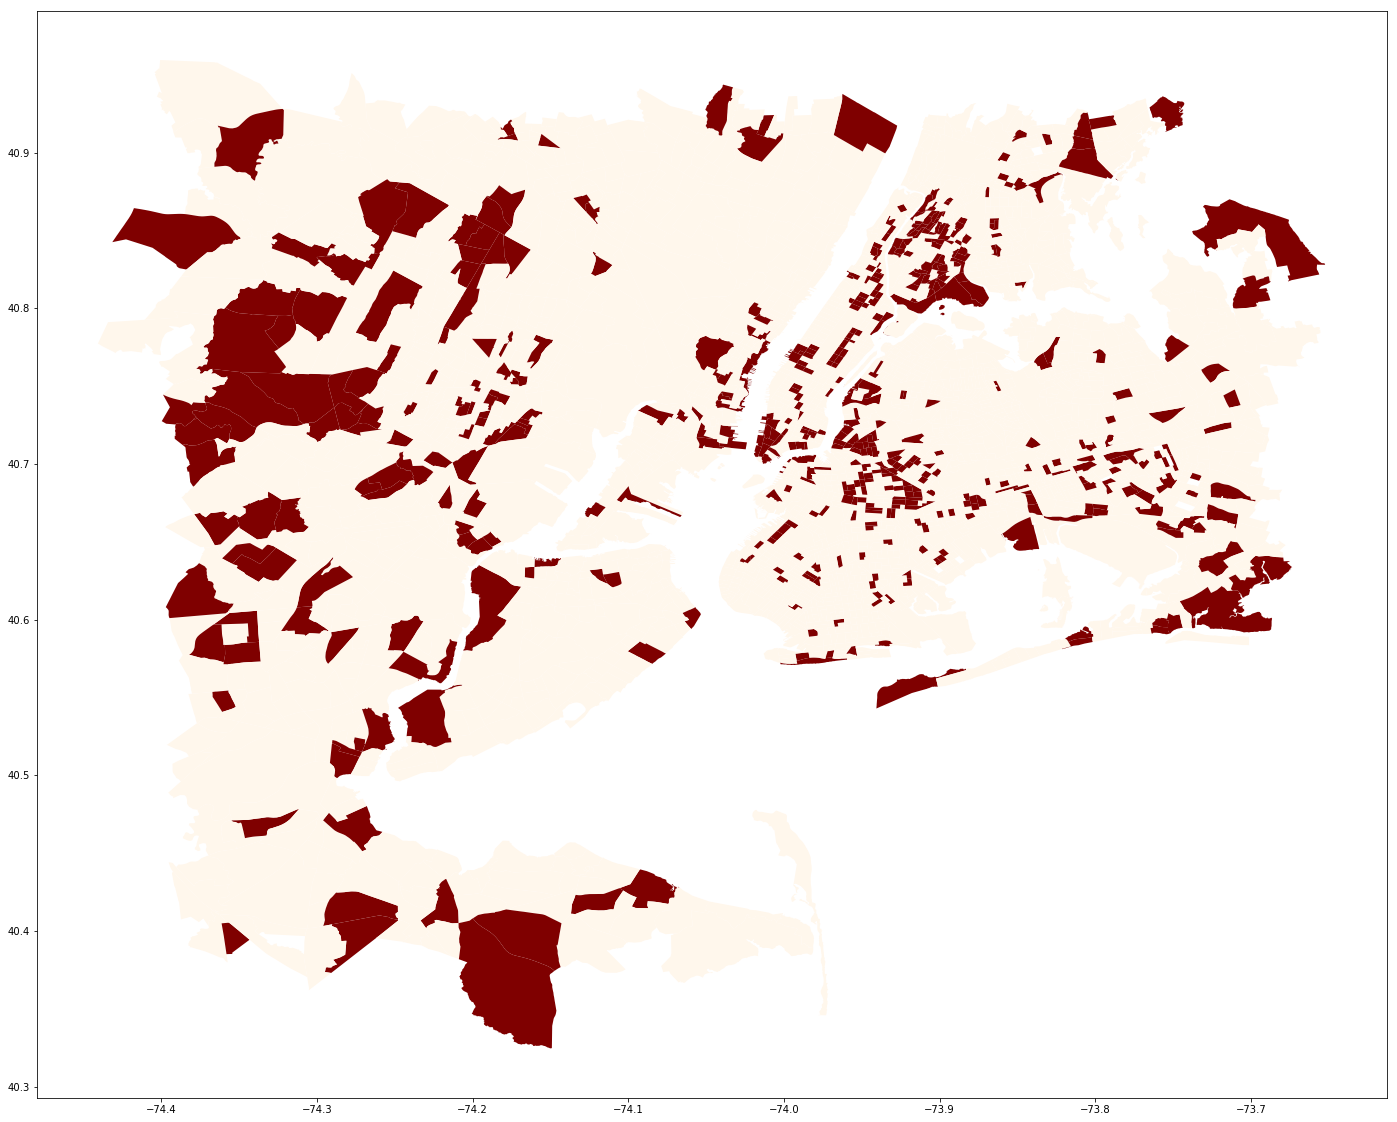

In [70]:
plt.rcParams['figure.figsize'] = (30, 20)
ax = data_sjoined_sum_merged.plot(column='Typologies', scheme='quantiles', cmap='OrRd')
ax.legend()

In [71]:
# data_sjoined_sum_merged.iloc[:,:6]

In [72]:
# sfig = pd.scatter_matrix(data_sjoined_sum_merged.iloc[:,:6], s=30, figsize=(10, 10), diagonal='kde')

In [73]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=712)

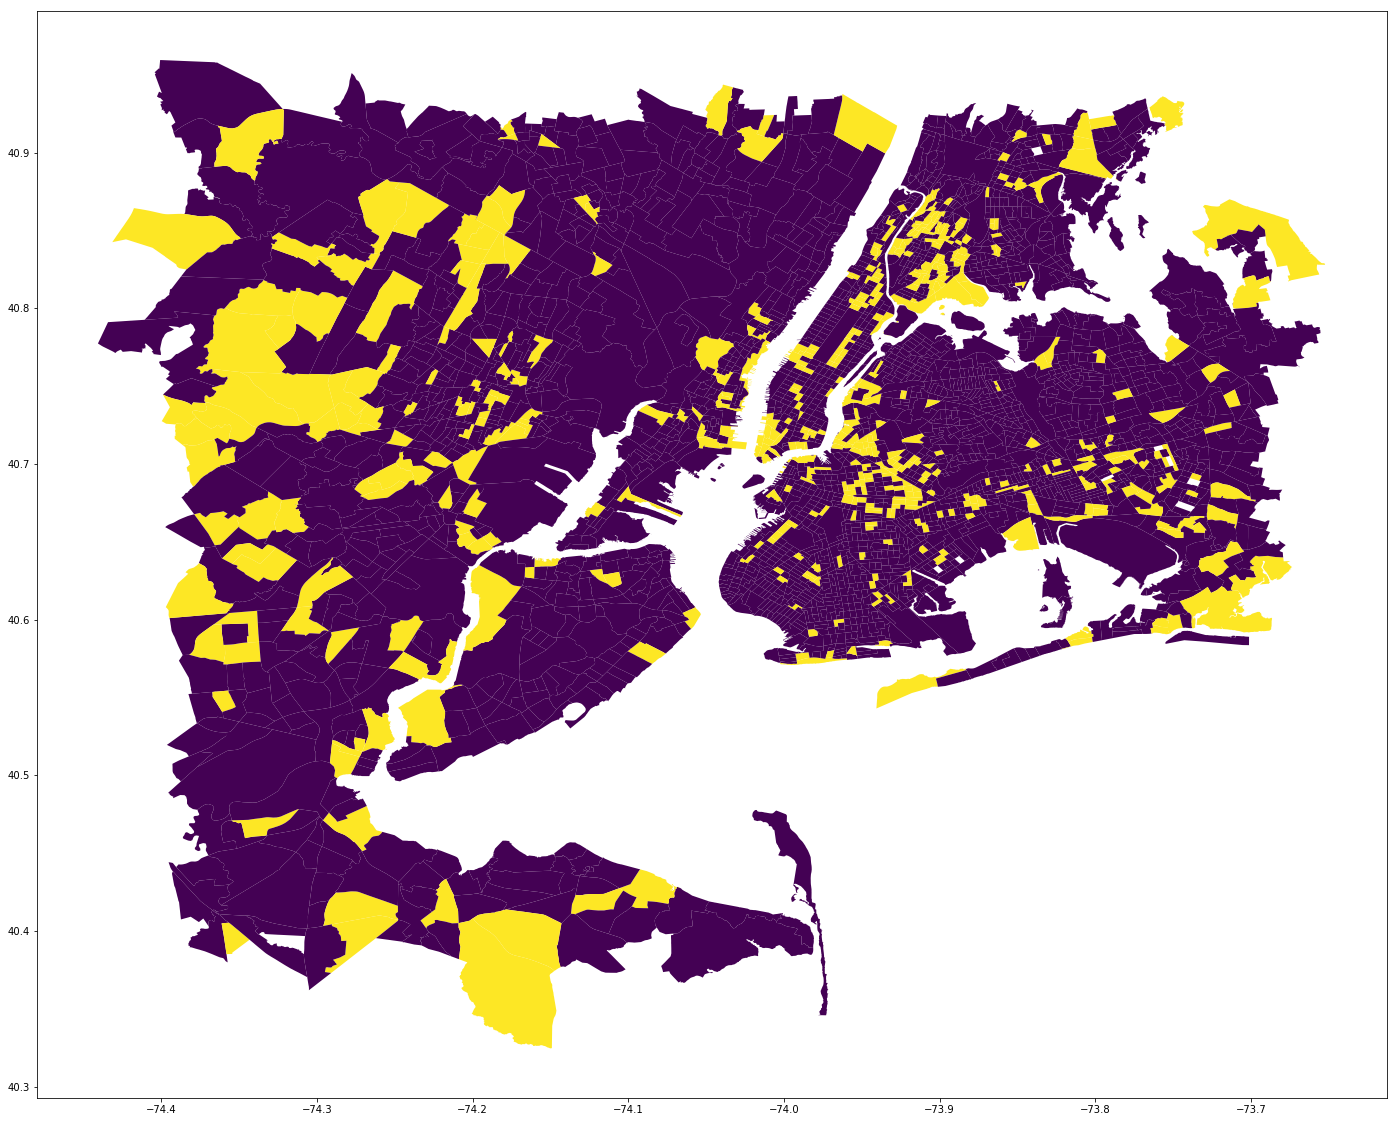

In [74]:
data_sjoined_sum_merged.plot(column='Typologies')

In [75]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=712)

# Part II. Modeling
### Analysis ## FOURSQUARE ONLY

In [76]:
### Preprocessing Data
### Preprocessing Data
X_foursquare = data_sjoined_sum_merged.drop(['Typologies','GEOID','geometry'],axis =1).copy()
# X_foursquare = data_sjoined_sum_merged.drop(['Typologies', 'geometry'],axis =1).copy()
y = data_sjoined_sum_merged.Typologies

## change to zeros

# replace with mean/median

# create a new

print(X_foursquare.shape)
# X_foursquare.replace(False,0,inplace=True)
# X_foursquare.replace('FALSE',0,inplace=True)
# X_foursquare.replace('#NULL!',0,inplace=True)
# X_foursquare.replace(nan,0,inplace=True)

X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(3009, 709)
(3009, 709)


In [77]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_foursquare, y, test_size = 0.3, random_state = 1)    

In [78]:
X_foursquare.columns

Index(['Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center', 'Type_Advertising Agency',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=709)

In [79]:
# Normalize
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

models = ['o','scaled','minmaxed']
Xdata_scaled = preprocessing.scale(X_foursquare)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_foursquare)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['o'] = X_foursquare
dictx['scaled'] = Xdata_scaled
dictx['minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [80]:
model = {}
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}

model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
resultset=data_sjoined_sum_merged.copy()

In [81]:
from sklearn.model_selection import train_test_split

X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(2106, 709) (903, 709) (2106,) (903,)
(2106, 709) (903, 709) (2106,) (903,)
(2106, 709) (903, 709) (2106,) (903,)


# LR

In [107]:
## Logistic Reeg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab

for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]
    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
    resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'minmaxed': {'DT': 0.0, 'Logit': 0.19047619047619047, 'RF': 0.0, 'SVM': 0.0},
 'o': {'DT': 0.0,
  'Logit': 0.061349693251533742,
  'RF': 0.0,
  'SVM': 0.1391304347826087},
 'scaled': {'DT': 0.0,
  'Logit': 0.20121951219512196,
  'RF': 0.0,
  'SVM': 0.14814814814814817}}

# DT

In [83]:
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
for m in models:
    #     dictx[m]
    #     model[m]
    param_grid = {'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
    dt=DecisionTreeClassifier()
    gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
    ds=gr.fit(X_train[m],y_train[m])
    print (ds.best_params_)

    print(gr.score(X_test[m],y_test[m]))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 1, 'max_leaf_nodes': 2}
0.829457364341


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 1, 'max_leaf_nodes': 2}
0.829457364341


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 1, 'max_leaf_nodes': 2}
0.829457364341


In [84]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
    for c in range(5):

        dt=DecisionTreeClassifier()


        dt = DecisionTreeClassifier(max_depth=ds.best_params_['max_depth'],max_leaf_nodes=ds.best_params_['max_leaf_nodes'])
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))

    print(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
    resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores

0.829457364341
0.829457364341


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.

0.829457364341


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'minmaxed': {'DT': 0.0, 'Logit': 0.19047619047619047},
 'o': {'DT': 0.0, 'Logit': 0.061349693251533742},
 'scaled': {'DT': 0.0, 'Logit': 0.20121951219512196}}

In [85]:
print(m)
list(dt.predict(X_test[m]))

minmaxed


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [86]:
resultset['predicttyp2']=gr.predict(X_foursquare)

In [87]:
resultset['actualtyp']=data_sjoined_sum_merged.Typologies

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
def featureImportancePlot(rf, labels):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    
    importances = rf.feature_importances_[:10]
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure()
    pl.title("Feature importances")
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", yerr=std[indices], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()


o


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 8, 'max_depth': 10, 'max_leaf_nodes': 8}
0.829457364341
i am here
0.829457364341


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

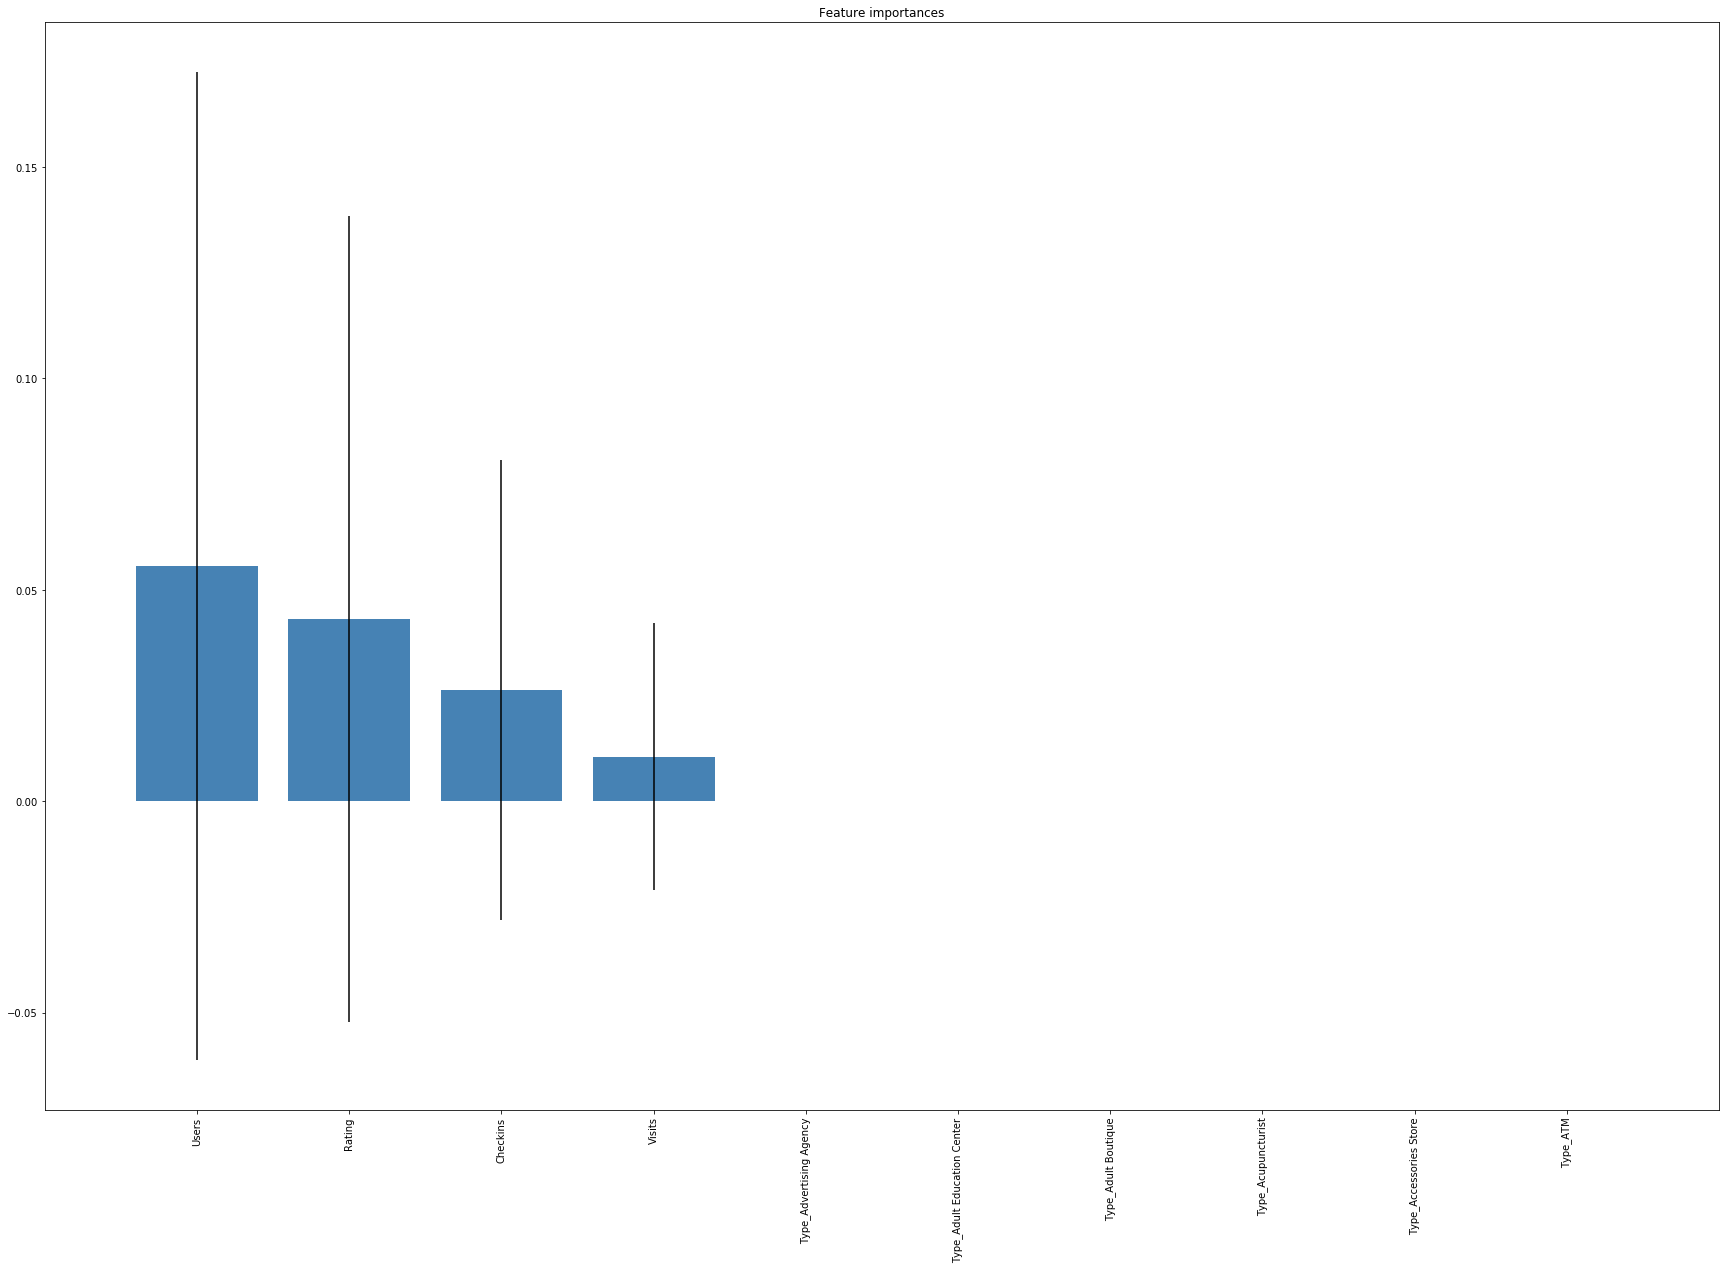

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


scaled
{'n_estimators': 7, 'max_depth': 3, 'max_leaf_nodes': 5}
0.829457364341
i am here
0.828349944629


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

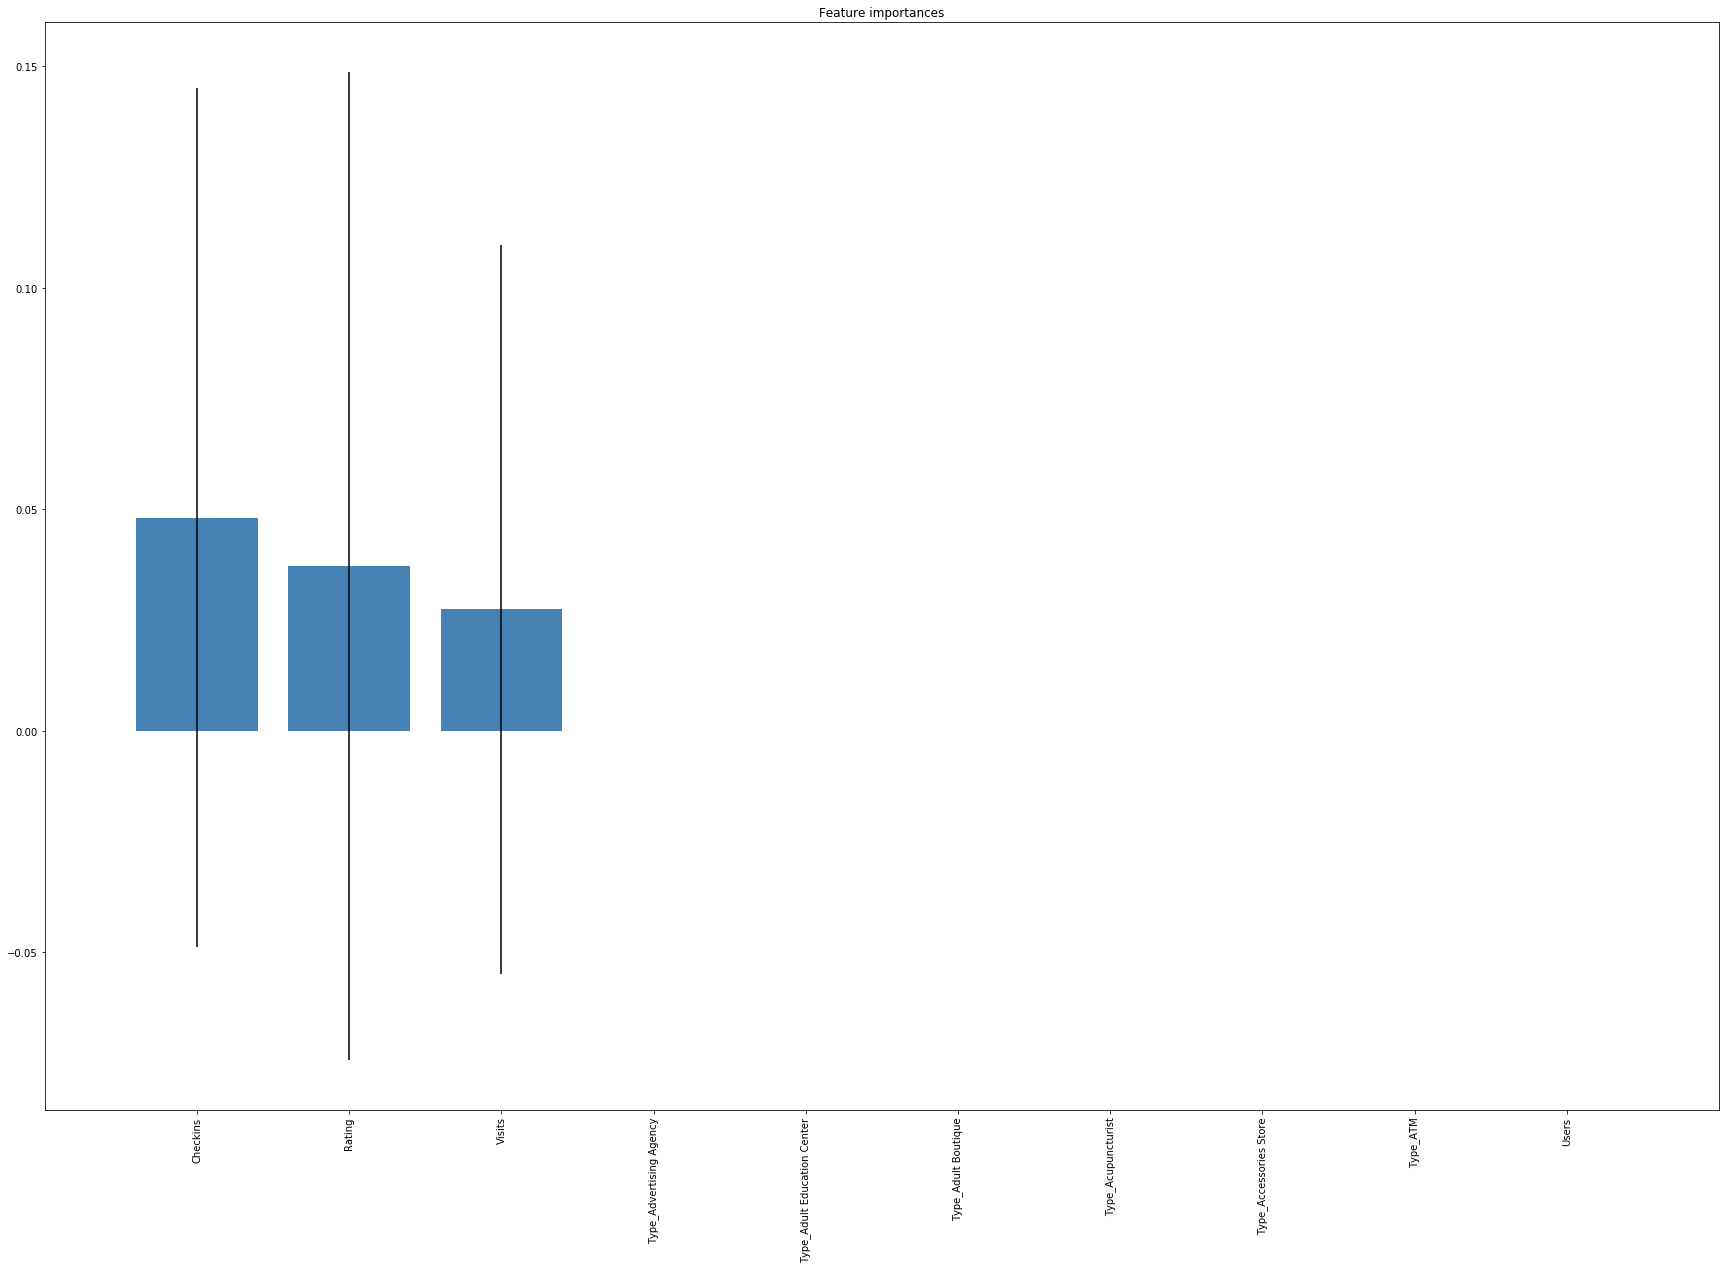

minmaxed


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 6, 'max_depth': 7, 'max_leaf_nodes': 10}
0.827242524917
i am here
0.826135105205


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

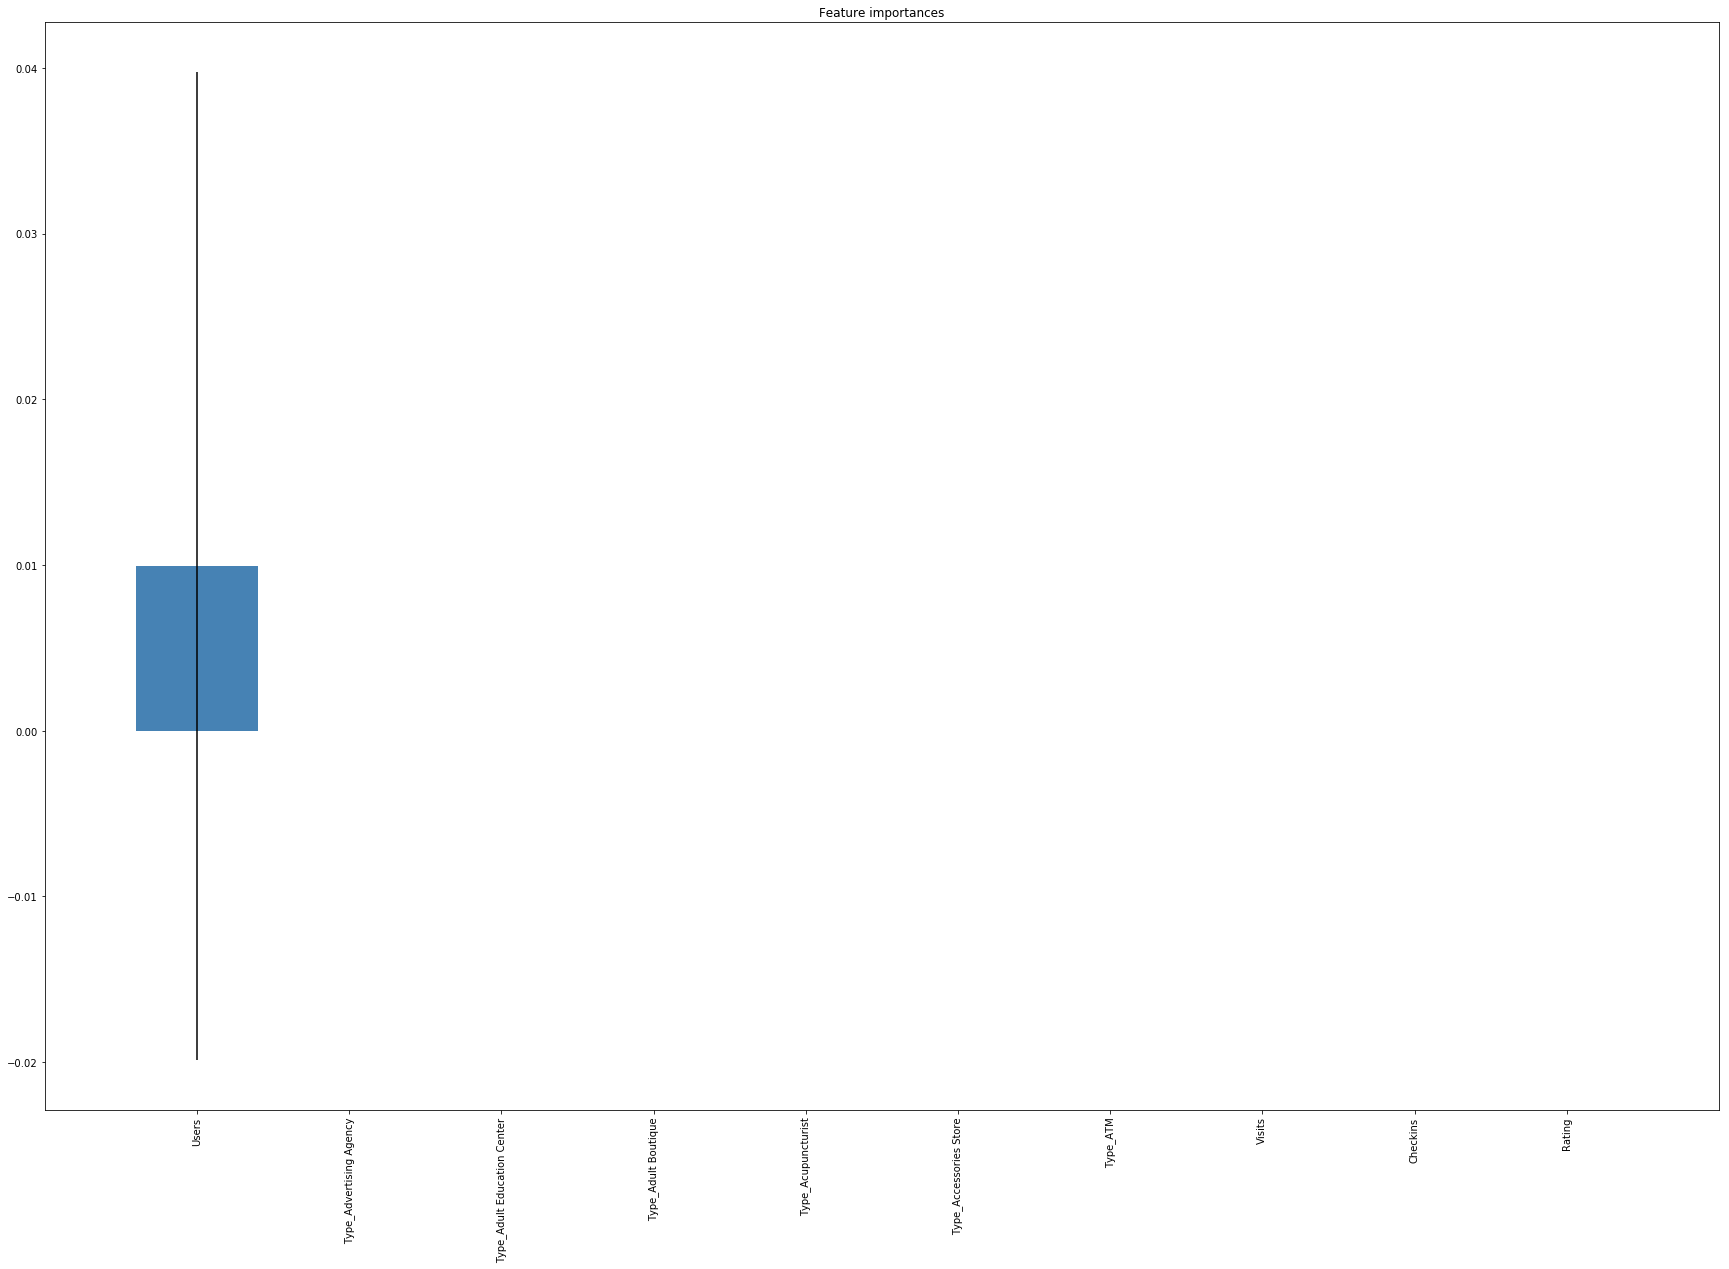

{'minmaxed': {'DT': 0.0, 'Logit': 0.19047619047619047, 'RF': 0.0},
 'o': {'DT': 0.0, 'Logit': 0.061349693251533742, 'RF': 0.0},
 'scaled': {'DT': 0.0, 'Logit': 0.20121951219512196, 'RF': 0.0}}

In [89]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rs=gr.fit(X_train[m],y_train[m])
    print (rs.best_params_)
    print(gr.score(X_test[m],y_test[m]))
    OS = []
    print("i am here")
    for c in range(5):
        rf=RandomForestClassifier()
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    print(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    featureImportancePlot(rf, X_foursquare.columns)
    resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores


#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [90]:
from sklearn.model_selection import GridSearchCV

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
    resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
model

0.829457364341
0.829457364341
0.829457364341
0.829457364341
0.829457364341
0.829457364341


{'minmaxed': {'DT': 0.8294573643410853,
  'Logit': 0.71760797342192695,
  'RF': 0.82812846068660018,
  'SVM': 0.8294573643410853},
 'o': {'DT': 0.8294573643410853,
  'Logit': 0.83056478405315615,
  'RF': 0.82901439645625685,
  'SVM': 0.8294573643410853},
 'scaled': {'DT': 0.8294573643410853,
  'Logit': 0.70985603543743081,
  'RF': 0.82879291251384279,
  'SVM': 0.8294573643410853}}

In [91]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model[m][i])
    print('-----------------------------------------------------')
model.keys(), model.values()

o
Logit
0.830564784053
DT
0.829457364341
RF
0.829014396456
SVM
0.829457364341
-----------------------------------------------------
scaled
Logit
0.709856035437
DT
0.829457364341
RF
0.828792912514
SVM
0.829457364341
-----------------------------------------------------
minmaxed
Logit
0.717607973422
DT
0.829457364341
RF
0.828128460687
SVM
0.829457364341
-----------------------------------------------------


(dict_keys(['o', 'scaled', 'minmaxed']),
 dict_values([{'SVM': 0.8294573643410853, 'DT': 0.8294573643410853, 'Logit': 0.83056478405315615, 'RF': 0.82901439645625685}, {'SVM': 0.8294573643410853, 'DT': 0.8294573643410853, 'Logit': 0.70985603543743081, 'RF': 0.82879291251384279}, {'SVM': 0.8294573643410853, 'DT': 0.8294573643410853, 'Logit': 0.71760797342192695, 'RF': 0.82812846068660018}]))

In [98]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_f1_scores[m][i])
    print('-----------------------------------------------------')
    print(model_f1_scores[m].keys(), model_f1_scores[m].values())
model_f1_scores.keys(), model_f1_scores.values()


o
Logit
0.0613496932515
DT
0.0
RF
0.0
SVM
0.139130434783
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.1391304347826087, 0.0, 0.061349693251533742, 0.0])
scaled
Logit
0.201219512195
DT
0.0
RF
0.0
SVM
0.148148148148
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.14814814814814817, 0.0, 0.20121951219512196, 0.0])
minmaxed
Logit
0.190476190476
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.0, 0.0, 0.19047619047619047, 0.0])


(dict_keys(['o', 'scaled', 'minmaxed']),
 dict_values([{'SVM': 0.1391304347826087, 'DT': 0.0, 'Logit': 0.061349693251533742, 'RF': 0.0}, {'SVM': 0.14814814814814817, 'DT': 0.0, 'Logit': 0.20121951219512196, 'RF': 0.0}, {'SVM': 0.0, 'DT': 0.0, 'Logit': 0.19047619047619047, 'RF': 0.0}]))

In [93]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_recall_scores[m][i])
    print('-----------------------------------------------------')
    print(model_recall_scores[m].keys(), model_recall_scores[m].values())
model_recall_scores.keys(), model_recall_scores.values()

o
Logit
0.0324675324675
DT
0.0
RF
0.0
SVM
0.103896103896
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.1038961038961039, 0.0, 0.032467532467532464, 0.0])
scaled
Logit
0.214285714286
DT
0.0
RF
0.0
SVM
0.116883116883
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.11688311688311688, 0.0, 0.21428571428571427, 0.0])
minmaxed
Logit
0.194805194805
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.0, 0.0, 0.19480519480519481, 0.0])


(dict_keys(['o', 'scaled', 'minmaxed']),
 dict_values([{'SVM': 0.1038961038961039, 'DT': 0.0, 'Logit': 0.032467532467532464, 'RF': 0.0}, {'SVM': 0.11688311688311688, 'DT': 0.0, 'Logit': 0.21428571428571427, 'RF': 0.0}, {'SVM': 0.0, 'DT': 0.0, 'Logit': 0.19480519480519481, 'RF': 0.0}]))

In [94]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_precision_scores[m][i])
    print(model_precision_scores[m].keys(), model_precision_scores[m].values())
    print('-----------------------------------------------------')


o
Logit
0.555555555556
DT
0.0
RF
0.0
SVM
0.210526315789
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.21052631578947367, 0.0, 0.55555555555555558, 0.0])
-----------------------------------------------------
scaled
Logit
0.189655172414
DT
0.0
RF
0.0
SVM
0.202247191011
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.20224719101123595, 0.0, 0.18965517241379309, 0.0])
-----------------------------------------------------
minmaxed
Logit
0.186335403727
DT
0.0
RF
0.0
SVM
0.0
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.0, 0.0, 0.18633540372670807, 0.0])
-----------------------------------------------------


- You can refer to https://github.com/mv1742/updny_2

## Results Analysis

In [99]:
print(m)
resultset.columns

minmaxed


Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'scaled_DT_predicttyp', 'minmaxed_DT_predicttyp', 'predicttyp2',
       'actualtyp', 'o_RF_predicttyp', 'scaled_RF_predicttyp',
       'minmaxed_RF_predicttyp', 'o_SVM_predicttyp', 'scaled_SVM_predicttyp',
       'minmaxed_SVM_predicttyp'],
      dtype='object', length=726)

The plots below show the number of positive (gentrifying, 1) and negative (not-gentrifying, 0) typologies based on the actual typology labels and the predicted labels from each model.

0.0    2501
1.0     508
Name: actualtyp, dtype: int64

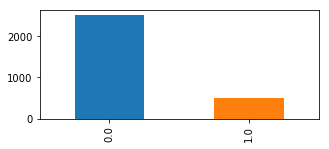

In [102]:
resultset['actualtyp'].value_counts().plot(kind='bar', figsize=(5,2))
resultset['actualtyp'].value_counts()

In [104]:
modelslist

['Logit', 'DT', 'RF', 'SVM']

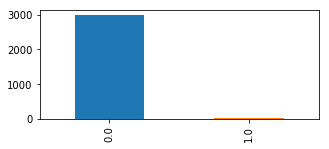

0.0    2979
1.0      30
Name: o_Logit_predicttyp, dtype: int64


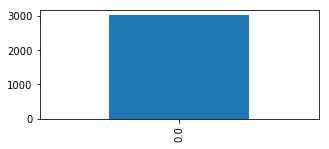

0.0    3009
Name: o_DT_predicttyp, dtype: int64


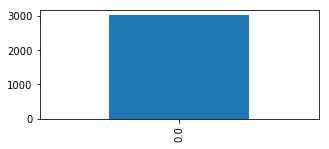

0.0    3009
Name: o_RF_predicttyp, dtype: int64


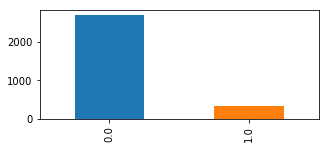

0.0    2681
1.0     328
Name: o_SVM_predicttyp, dtype: int64


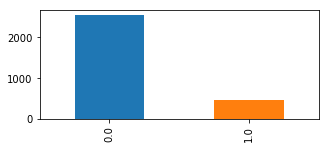

0.0    2547
1.0     462
Name: scaled_Logit_predicttyp, dtype: int64


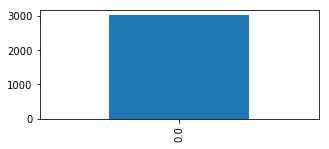

0.0    3009
Name: scaled_DT_predicttyp, dtype: int64


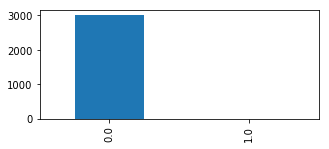

0.0    3006
1.0       3
Name: scaled_RF_predicttyp, dtype: int64


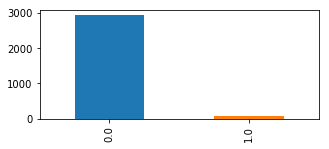

0.0    2926
1.0      83
Name: scaled_SVM_predicttyp, dtype: int64


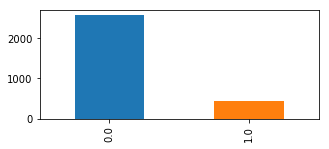

0.0    2563
1.0     446
Name: minmaxed_Logit_predicttyp, dtype: int64


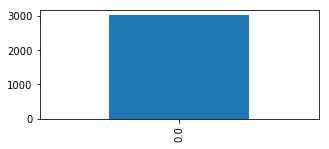

0.0    3009
Name: minmaxed_DT_predicttyp, dtype: int64


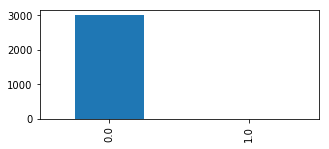

0.0    3002
1.0       7
Name: minmaxed_RF_predicttyp, dtype: int64


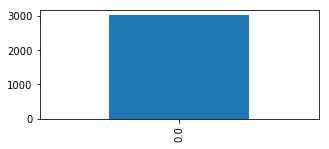

0.0    3009
Name: minmaxed_SVM_predicttyp, dtype: int64


In [111]:
for m in models:
    for i in modelslist:
        resultset[m+'_'+i+'_predicttyp'].value_counts().plot(kind='bar',figsize=(5,2))
        plt.show()
        print(resultset[m+'_'+i+'_predicttyp'].value_counts())

Note that all of the predicted results for the decision tree model are 0 (non-gentrifgying). The confusion matrix below shows [[TN, FP][FN, TP]]-- you can see that all of the results are negative

In [125]:
from sklearn import metrics
metrics.confusion_matrix(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

array([[2320,  181],
       [ 227,  281]])

In [117]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [124]:
perf_measure(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

(281, 181, 2320, 227)

Below you can see that logit produces 30 positive results (19 true and 11 false), while random forest produces only 1 positive (it is true).

In [126]:
perf_measure(resultset.actualtyp, resultset.scaled_RF_predicttyp)

(2, 1, 2500, 506)

In [127]:
perf_measure(resultset.actualtyp, resultset.o_SVM_predicttyp)

(328, 0, 2501, 180)

In [128]:
resultsfull=data_sjoined_sum_merged.merge(resultset[["scaled_Logit_predicttyp"]], right_index=True, left_index=True)

In [129]:
resultsfull.head()

,GEOID,Rating,Checkins,Users,Visits,Type_ATM,Type_Accessories Store,Type_Acupuncturist,Type_Adult Boutique,Type_Adult Education Center,...,Category_Personal care,Category_Social,Category_Taking care,Category_Unknown,Class_,Class_Necessary,Class_Optional,Typologies,geometry,scaled_Logit_predicttyp
0,34003003200,20.0,6591,2767,10611,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,3.0,3.0,4.0,12.0,0.0,POLYGON ((-73.99327399959544 40.92387300033873...,0.0
1,34003003401,0.0,404,47,412,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,POLYGON ((-74.01265600037409 40.91041700034431...,1.0
2,34003003402,13.6,4444,1722,6407,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,0.0,1.0,1.0,10.0,16.0,0.0,"POLYGON ((-73.9994910003094 40.92003999984609,...",0.0
3,34003003500,13.4,3279,1427,4469,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,3.0,0.0,5.0,0.0,POLYGON ((-73.98440499979093 40.91205200019972...,0.0
4,34003004001,11.6,2135,1434,4319,0.0,0.0,0.0,0.0,0.0,...,4.0,8.0,0.0,3.0,3.0,8.0,25.0,0.0,POLYGON ((-74.02548100004816 40.88172900029316...,0.0


In [133]:
def set_resulttyp(row):
    if row["actualtyp"] == 0:
        if row["scaled_Logit_predicttyp"] == 0:
            return "TN"
        elif row["scaled_Logit_predicttyp"] == 1: 
            return "FP" 
    elif row["actualtyp"] == 1:
        if row["scaled_Logit_predicttyp"] == 1:
            return "TP"
        elif  row["scaled_Logit_predicttyp"] == 0:
            return "FN"

#df = df.assign(color=df.apply(set_color, axis=1))

In [135]:
resultsfinal=resultsfull.assign(scaled_Logit_restultyp=resultset.apply(set_resulttyp, axis=1))

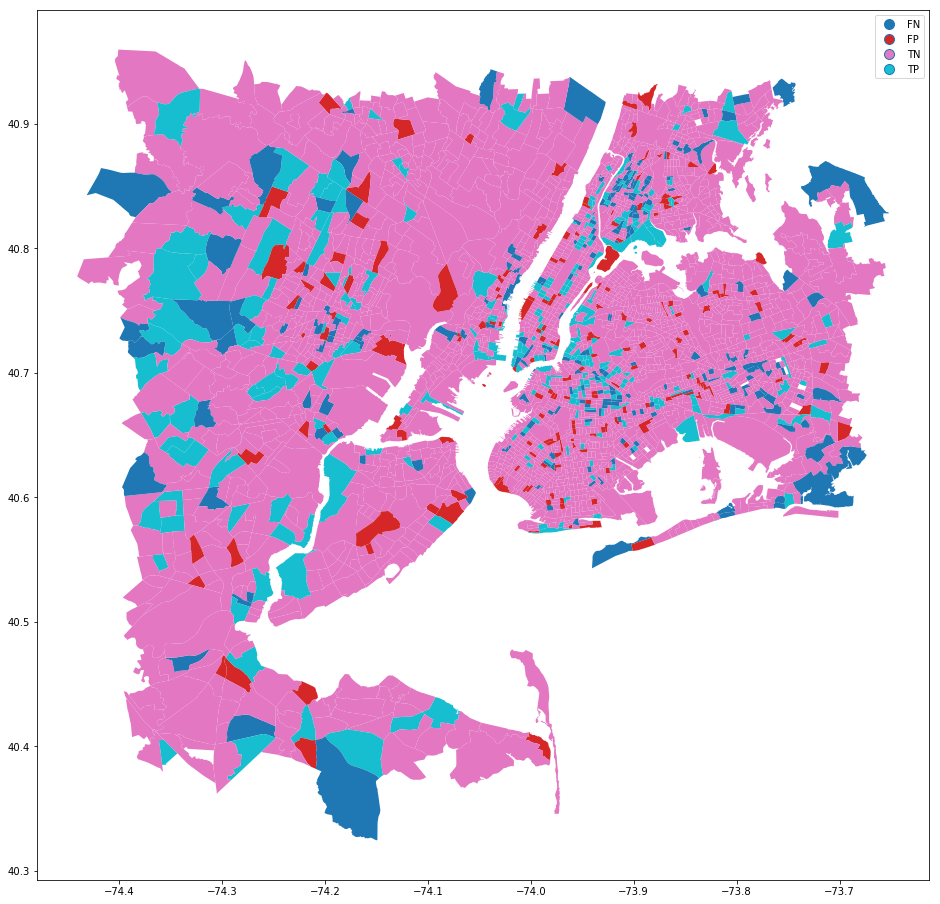

In [136]:
f, ax = plt.subplots(figsize=(16,16))
resultsfinal.plot(column='scaled_Logit_restultyp', ax=ax, legend=True)

The only positive results for the logit model (whether true or false positive) fell in the NYC and Jersey City areas-- no outer borough or other NJ/CT/NY tracts were picked up. 